# Crime Analysis.
---

### Analysis

- Our Analysis here

In [44]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
hate_crime_path = "Resources/hate_crime.csv"
covid_path = "Resources/CAcovidhospitalizations.csv"

# Read the crime data and the study results
crime_df = pd.read_csv(hate_crime_path)
covid_df = pd.read_csv(covid_path)

#cleaning the data with conditions
state_df = crime_df[crime_df["state_name"]=="California"]
clean_df = state_df[state_df["data_year"].isin([2019,2020,2021,2022]) ]
#clean_df = state_df[state_df["data_year"]== 2022]


# Display the data table for preview
clean_df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
201550,472556,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201551,472557,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Jewish,Individual,S,S
201552,472558,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Government,S,S
201553,472560,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Shopping Mall,Anti-Black or African American,Individual,S,S
201554,472561,2019,CA036410X,Yucca Valley,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232576,1493654,2022,CA0370900,National City,NaN,City,CA,California,Pacific,West,...,Multiple,Multiple,1,Aggravated Assault,1.0,Specialty Store,Anti-Mental Disability,Individual,S,S
232577,1493847,2022,CA0010800,Newark,NaN,City,CA,California,Pacific,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
232578,1493848,2022,CA0010800,Newark,NaN,City,CA,California,Pacific,West,...,Unknown,Not Specified,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Gay (Male),Individual,S,S
232579,1493874,2022,CA0330300,Blythe,NaN,City,CA,California,Pacific,West,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S


In [2]:
hate_clean_df = clean_df[["incident_id", "data_year", "offender_race","bias_desc"]]
hate_clean_df

,incident_id,data_year,offender_race,bias_desc
201550,472556,2019,White,Anti-Black or African American
201551,472557,2019,Unknown,Anti-Jewish
201552,472558,2019,Unknown,Anti-Jewish
201553,472560,2019,White,Anti-Black or African American
201554,472561,2019,White,Anti-Gay (Male)
...,...,...,...,...
232576,1493654,2022,Multiple,Anti-Mental Disability
232577,1493847,2022,Not Specified,Anti-Gay (Male)
232578,1493848,2022,Unknown,Anti-Gay (Male)
232579,1493874,2022,Black or African American,Anti-White


In [3]:
hate_clean_df["bias_desc"] = hate_clean_df["bias_desc"].replace({"Anti-Gay (Male)": "Anti-Gay",
                                                        "Anti-Lesbian (Female)": "Anti-Gay",
                                                        "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Transgender": "Anti-Gay", 
                                                        "Anti-Bisexual": "Anti-Gay", 
                                                        "Anti-Black or African American": "Anti-Black",
                                                        "Anti-Hispanic or Latino": "Anti-Hispanic",
                                                        "Anti-Asian;Anti-Black or African American;Anti-Hispanic or Latino": "Anti-Asian",
                                                        "Anti-Black or African American;Anti-Gay (Male)": "Anti-Gay",
                                                        "Anti-Black or African American;Anti-Gay (Male)": "Anti-Gay",
                                                        "Anti-Gay (Male);Anti-Transgender": "Anti-Gay",
                                                        "Anti-Asian;Anti-Black or African American": "Anti-Asian",
                                                        "Anti-Black or African American;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Hispanic or Latino;Anti-Other Race/Ethnicity/Ancestry": "Anti-Hispanic",
                                                        "Anti-Asian;Anti-White": "Anti-Asian",
                                                        "Anti-Female;Anti-White": "Anti-Gender",
                                                        "Anti-Black or African American;Anti-Multiple Races, Group": "Anti-Black",
                                                        "Anti-Gay (Male);Anti-Gender Non-Conforming;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Gender Non-Conforming;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Jewish;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Native Hawaiian or Other Pacific Islander": "Anti-Other Race/Ethnicity/Ancestry",
                                                        "Anti-Gay (Male);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Asian;Anti-Female;Anti-Multiple Races, Group": "Anti-Asian",
                                                        "Anti-Black or African American;Anti-Gender Non-Conforming;Anti-Islamic (Muslim)":"Anti-Black",
                                                        "Anti-Black or African American;Anti-Female": "Anti-Black",
                                                        "Anti-Multiple Races, Group;Anti-Multiple Religions, Group": "Anti-Multiple Race",
                                                        "Anti-Islamic (Muslim);Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Black or African American;Anti-Other Christian": "Anti-Black",
                                                        "Anti-Asian;Anti-Native Hawaiian or Other Pacific Islander": "Anti-Asian",
                                                        "Anti-Black or African American;Anti-Other Religion": "Anti-Black",
                                                        "Anti-Bisexual;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Atheism/Agnosticism": "Anti-Other Religion",
                                                        "Anti-Catholic;Anti-Other Religion": "Anti-Other Christian",
                                                        "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group);Anti-Transgender": "Anti-Gay",
                                                        "Anti-Asian;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)": "Anti-Gay",
                                                        "Anti-Gay (Male);Anti-White": "Anti-Gay",
                                                        "Anti-Male;Anti-White": "Anti-White",
                                                        "Anti-Gay (Male);Anti-White": "Anti-Gay",
                                                        "Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group);Anti-Protestant": "Anti-Gay",
                                                        "Anti-Jewish;Anti-Multiple Races, Group": "Anti-Jewish",            
                                                        "Anti-Black or African American;Anti-Gay (Male);Anti-Other Race/Ethnicity/Ancestry": "Anti-Black",
                                                        "Anti_Black": "Anti-Black",
                                                        "Anti-Multiple Races, Group": "Anti-Multiple Race",
                                                        "Anti-Black or African American;Anti-White": "Anti-Black",
                                                        "Anti-Black or African American;Anti-Transgender": "Anti-Gay",
                                                        "Anti-Asian;Anti-Other Race/Ethnicity/Ancestry": "Anti-Asian",
                                                        "Anti-Gay (Male);Anti-Hispanic or Latino": "Anti-Gay",
                                                        "Anti-Black or African American;Anti-Lesbian (Female)": "Anti-Gay",
                                                        "Anti-Black or African American;Anti-Jewish": "Anti-Black",
                                                        "Anti-Black or African American;Anti-Hispanic or Latino": "Anti-Black",
                                                        "Anti-Jehovah's Witness": "Anti-Other Religion",
                                                        "Anti-Hindu": "Anti-Other Religion",
                                                        "Anti-Eastern Orthodox (Russian, Greek, Other)": "Anti-Other Religion",
                                                        "Anti-Sikh": "Anti-Other Religion",
                                                        "Anti-Church of Jesus Christ": "Anti-Other Religion",
                                                        "Anti-Buddhist": "Anti-Other Religion",
                                                        "Anti-Gender Non-Conforming":"Anti-Gay",
                                                        "Anti-Heterosexual": "Anti-Gay",
                                                        "Anti-American Indian or Alaska Native": "Anti-Other Race/Ethnicity/Ancestry",
                                                        "Anti-Protestant": "Anti-Other Religion",
                                                        "Anti-Multiple Religions, Group": "Anti-Other Religion",
                                                        "Anti-Gender Non-Conforming": "Anti-Gay",
                                                        "Anti-Multiple Race": "Anti-Other Race/Ethnicity/Ancestry",
                                                        "Anti-Islamic (Muslim)": "Anti-Other Religion",
                                                        "Anti-Other Christian": "Anti-Other Christian",
                                                        "Anti-Arab": "Anti-Other Race/Ethnicity/Ancestry",
                                                        "Anti-Male": "Anti-Gender",
                                                        "Anti-Female": "Anti-Gender",
                                                        "Anti-Physical Disability": "Anti-Disability",
                                                        "Anti-Mental Disability": "Anti-Disability"})

C:\Users\sambi\AppData\Local\Temp\ipykernel_15732\890985676.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hate_clean_df["bias_desc"] = hate_clean_df["bias_desc"].replace({"Anti-Gay (Male)": "Anti-Gay",


In [75]:
hate_clean_df["bias_desc"].value_counts()

bias_desc
Anti-Black                            1872
Anti-Gay                              1363
Anti-Hispanic                          668
Anti-Jewish                            597
Anti-Asian                             524
Anti-Other Race/Ethnicity/Ancestry     358
Anti-White                             304
Anti-Other Religion                    216
Anti-Multiple Race                     133
Anti-Other Christian                    49
Anti-Catholic                           48
Anti-Disability                         38
Anti-Gender                             35
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

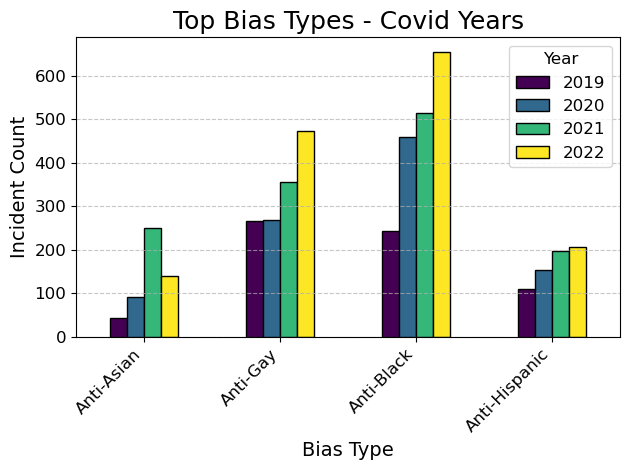

In [78]:
# group bias types and eyars to put into graph
bias_count = hate_clean_df.groupby(["bias_desc", "data_year"])["incident_id"].count()

# Specify the order of bias types
index = ["Anti-Asian", "Anti-Gay", "Anti-Black", "Anti-Hispanic"]

# Plot bar chart for top hate crimes
plt.figure(figsize=(10, 6))  # Adjust figure size
bias_count.loc[index].unstack().plot(kind="bar", colormap="viridis", edgecolor='black')  # Use a professional colormap and add edgecolor for clarity

# Customize the bar chart
plt.title("Top Bias Types - Covid Years", fontsize=18)
plt.xlabel('Bias Type', fontsize=14)
plt.ylabel('Incident Count', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  
plt.yticks(fontsize=12)  
plt.legend(title='Year', fontsize=12, title_fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7) 

# Display the plot
plt.tight_layout()  
plt.show()


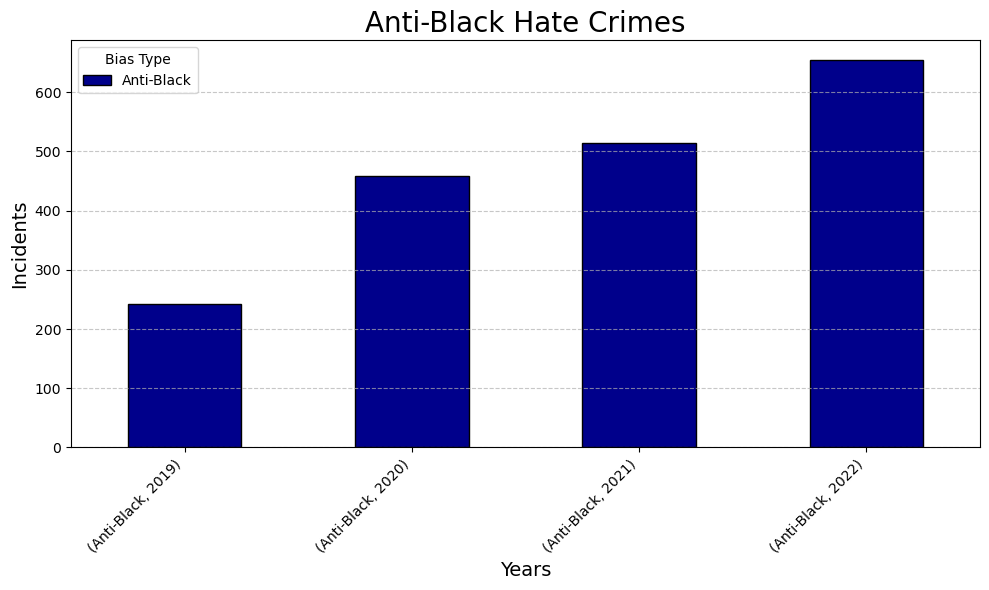

In [79]:
# Filter data for "Anti-Black" bias for the bar chart
black_bias_count = bias_count.loc[bias_count.index.get_level_values('bias_desc') == "Anti-Black"]

# Plot bar chart
plt.figure(figsize=(10, 6))  
black_bias_count.plot(kind="bar", color='darkblue', edgecolor='black') 

# Customize the bar chart
plt.title("Anti-Black Hate Crimes", fontsize=20)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bias Type', labels=["Anti-Black"])
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

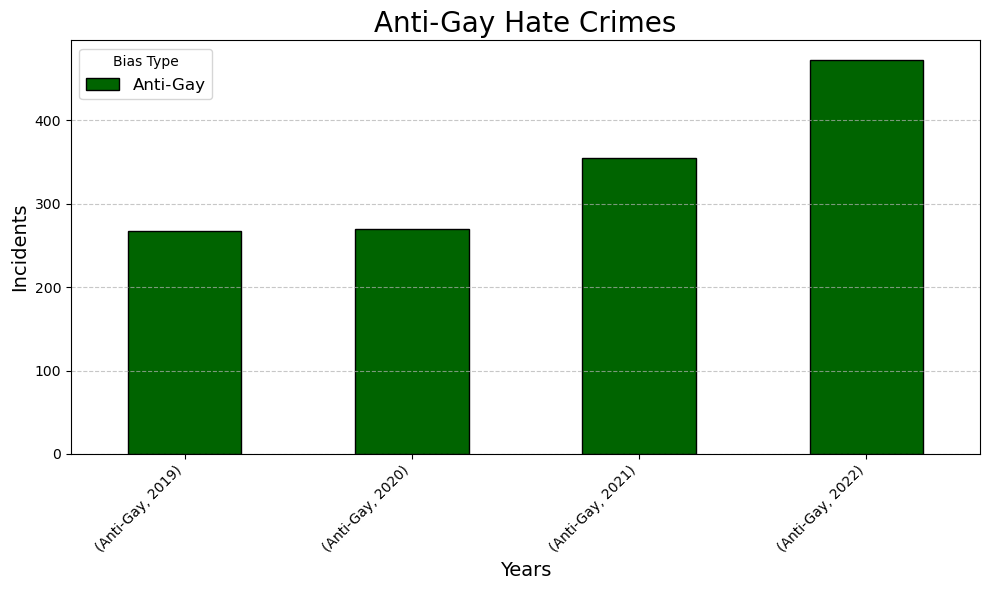

In [80]:
# Filter data for "Anti-Gay" bias  for the bar chart
gay_bias_count = bias_count.loc[bias_count.index.get_level_values('bias_desc') == "Anti-Gay"]

# Plot bar chart
plt.figure(figsize=(10, 6)) 
colors = ['darkgreen'] * len(gay_bias_count)  
gay_bias_count.plot(kind="bar", color=colors, edgecolor='black') 

# Customize the bar chart
plt.title("Anti-Gay Hate Crimes", fontsize=20)
plt.xlabel('Years', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Bias Type', labels=["Anti-Gay"], fontsize=12)  
plt.grid(axis='y', linestyle='--', alpha=0.7)  

# Display the plot
plt.tight_layout() 
plt.show()

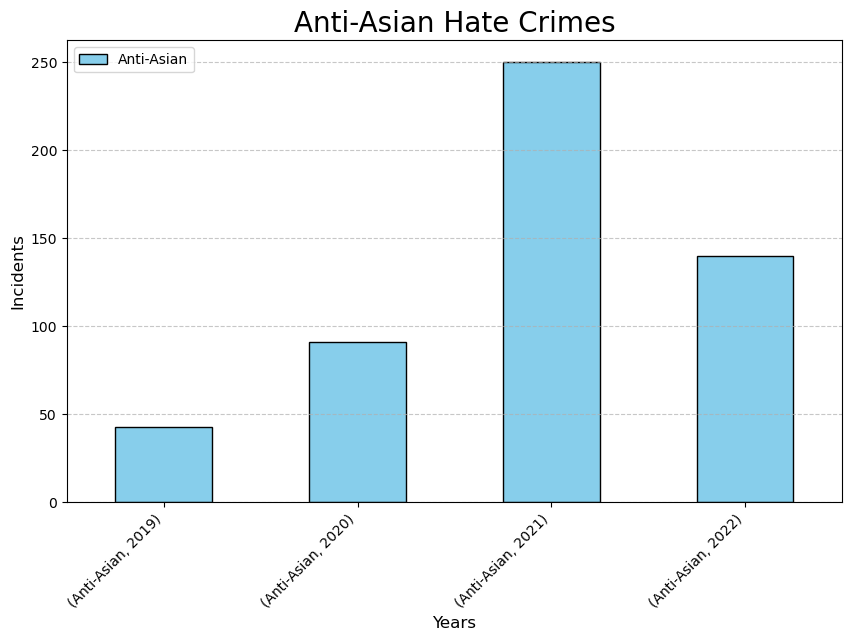

In [81]:
# Filter data for "Anti-Asian" bias  for the bar chart
asian_bias_count = bias_count.loc[bias_count.index.get_level_values('bias_desc') == "Anti-Asian"]

# Plot bar chart
plt.figure(figsize=(10, 6))  
asian_bias_count.plot(kind="bar", color='skyblue', edgecolor='black') 

# Customize the bar chart
plt.xticks(rotation=45, ha='right')  
plt.title("Anti-Asian Hate Crimes", fontsize=20)  
plt.xlabel("Years", fontsize=12)  
plt.ylabel("Incidents", fontsize=12, )  
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.legend(loc='upper left', labels=["Anti-Asian"])

# Display the plot
plt.show()

In [38]:
covid_df

,_id,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date
0,1,Kern,3/27/2020,0.0,0.0,NaN,NaN,0.0,0.0,NaN,2020-03-27
1,2,San Diego,3/29/2020,121.0,211.0,NaN,NaN,77.0,39.0,205.0,2020-03-29
2,3,Siskiyou,3/29/2020,0.0,0.0,NaN,NaN,0.0,0.0,2.0,2020-03-29
3,4,Napa,3/29/2020,0.0,26.0,NaN,NaN,NaN,NaN,5.0,2020-03-29
4,5,Riverside,3/29/2020,44.0,78.0,NaN,NaN,13.0,20.0,46.0,2020-03-29
...,...,...,...,...,...,...,...,...,...,...,...
77213,77214,Riverside,1/6/2024,112.0,4.0,83.0,1527.0,22.0,NaN,144.0,2024-01-06
77214,77215,Santa Cruz,1/6/2024,10.0,0.0,10.0,29.0,0.0,NaN,10.0,2024-01-06
77215,77216,Santa Barbara,1/6/2024,18.0,0.0,0.0,332.0,2.0,NaN,26.0,2024-01-06
77216,77217,Kings,1/6/2024,3.0,0.0,0.0,NaN,0.0,NaN,1.0,2024-01-06


In [39]:
covid_df["date"] = pd.to_datetime(covid_df["todays_date"])
covid_df

,_id,county,todays_date,hospitalized_covid_confirmed_patients,hospitalized_suspected_covid_patients,hospitalized_covid_patients,all_hospital_beds,icu_covid_confirmed_patients,icu_suspected_covid_patients,icu_available_beds,date
0,1,Kern,3/27/2020,0.0,0.0,NaN,NaN,0.0,0.0,NaN,2020-03-27
1,2,San Diego,3/29/2020,121.0,211.0,NaN,NaN,77.0,39.0,205.0,2020-03-29
2,3,Siskiyou,3/29/2020,0.0,0.0,NaN,NaN,0.0,0.0,2.0,2020-03-29
3,4,Napa,3/29/2020,0.0,26.0,NaN,NaN,NaN,NaN,5.0,2020-03-29
4,5,Riverside,3/29/2020,44.0,78.0,NaN,NaN,13.0,20.0,46.0,2020-03-29
...,...,...,...,...,...,...,...,...,...,...,...
77213,77214,Riverside,1/6/2024,112.0,4.0,83.0,1527.0,22.0,NaN,144.0,2024-01-06
77214,77215,Santa Cruz,1/6/2024,10.0,0.0,10.0,29.0,0.0,NaN,10.0,2024-01-06
77215,77216,Santa Barbara,1/6/2024,18.0,0.0,0.0,332.0,2.0,NaN,26.0,2024-01-06
77216,77217,Kings,1/6/2024,3.0,0.0,0.0,NaN,0.0,NaN,1.0,2024-01-06


In [73]:
data_x = clean_df["data_year"].unique()
data_x

array([2019, 2020, 2021, 2022], dtype=int64)

In [40]:
covid_df["date"].dt.year


0        2020
1        2020
2        2020
3        2020
4        2020
         ... 
77213    2024
77214    2024
77215    2024
77216    2024
77217    2024
Name: date, Length: 77218, dtype: int32

In [24]:
covid_df["date"].dt.strftime("%Y-%m")

0        2020-03
1        2020-03
2        2020-03
3        2020-03
4        2020-03
          ...   
77213    2024-01
77214    2024-01
77215    2024-01
77216    2024-01
77217    2024-01
Name: date, Length: 77218, dtype: object

In [45]:
covid_df["date"] = pd.to_datetime(covid_df["todays_date"])
covid_df

,incident_id,data_year,ori,pug_agency_name,pub_agency_unit,agency_type_name,state_abbr,state_name,division_name,region_name,...,offender_race,offender_ethnicity,victim_count,offense_name,total_individual_victims,location_name,bias_desc,victim_types,multiple_offense,multiple_bias
201550,472556,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
201551,472557,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,1.0,Residence/Home,Anti-Jewish,Individual,S,S
201552,472558,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,Unknown,Unknown,1,Destruction/Damage/Vandalism of Property,NaN,Highway/Road/Alley/Street/Sidewalk,Anti-Jewish,Government,S,S
201553,472560,2019,CA0371100,San Diego,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Shopping Mall,Anti-Black or African American,Individual,S,S
201554,472561,2019,CA036410X,Yucca Valley,NaN,City,CA,California,Pacific,West,...,White,Not Hispanic or Latino,1,Intimidation,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232576,1493654,2022,CA0370900,National City,NaN,City,CA,California,Pacific,West,...,Multiple,Multiple,1,Aggravated Assault,1.0,Specialty Store,Anti-Mental Disability,Individual,S,S
232577,1493847,2022,CA0010800,Newark,NaN,City,CA,California,Pacific,West,...,Not Specified,Not Specified,1,Simple Assault,1.0,Residence/Home,Anti-Gay (Male),Individual,S,S
232578,1493848,2022,CA0010800,Newark,NaN,City,CA,California,Pacific,West,...,Unknown,Not Specified,1,Aggravated Assault,1.0,Parking/Drop Lot/Garage,Anti-Gay (Male),Individual,S,S
232579,1493874,2022,CA0330300,Blythe,NaN,City,CA,California,Pacific,West,...,Black or African American,Not Specified,1,Aggravated Assault,1.0,Residence/Home,Anti-White,Individual,S,S


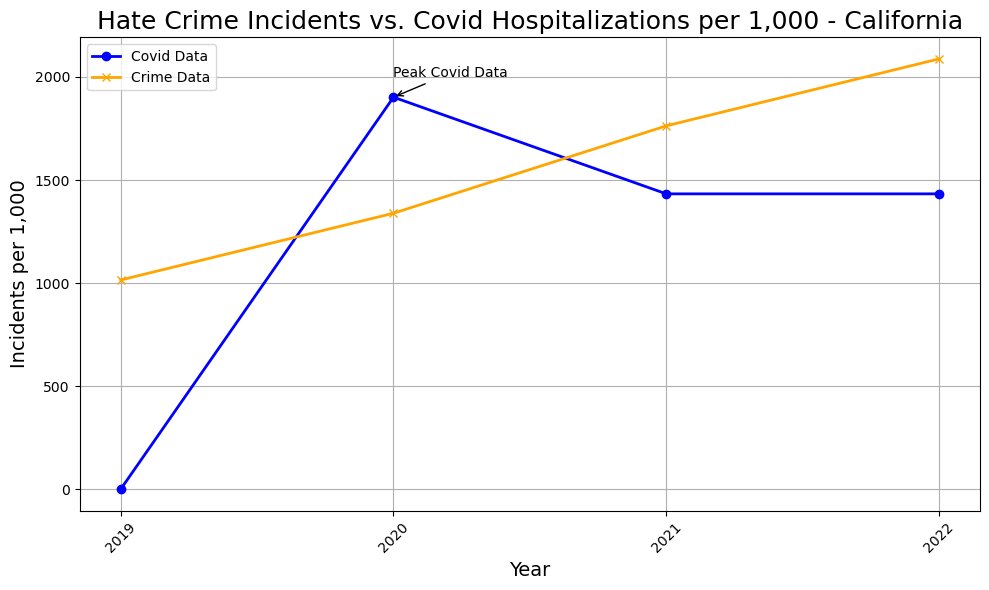

In [82]:


x_data = {"date":["2019","2020","2021","2022"],
                "covid_data": [0, 1902, 1433, 1433],
                "crime_data": [1015, 1339, 1763, 2088]}

# Plot line chart
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(x_data['date'], x_data['covid_data'], label='Covid Data', marker='o', color='blue', linestyle='-', linewidth=2)
plt.plot(x_data['date'], x_data['crime_data'], label='Crime Data', marker='x', color='orange', linestyle='-', linewidth=2)

# Customize the plot
plt.title("Hate Crime Incidents vs. Covid Hospitalizations per 1,000 - California", fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Incidents per 1,000', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Annotate key points if needed
plt.annotate('Peak Covid Data', xy=('2020', 1902), xytext=('2020', 2000), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()

Correlation Coefficient: -0.14709031422969765


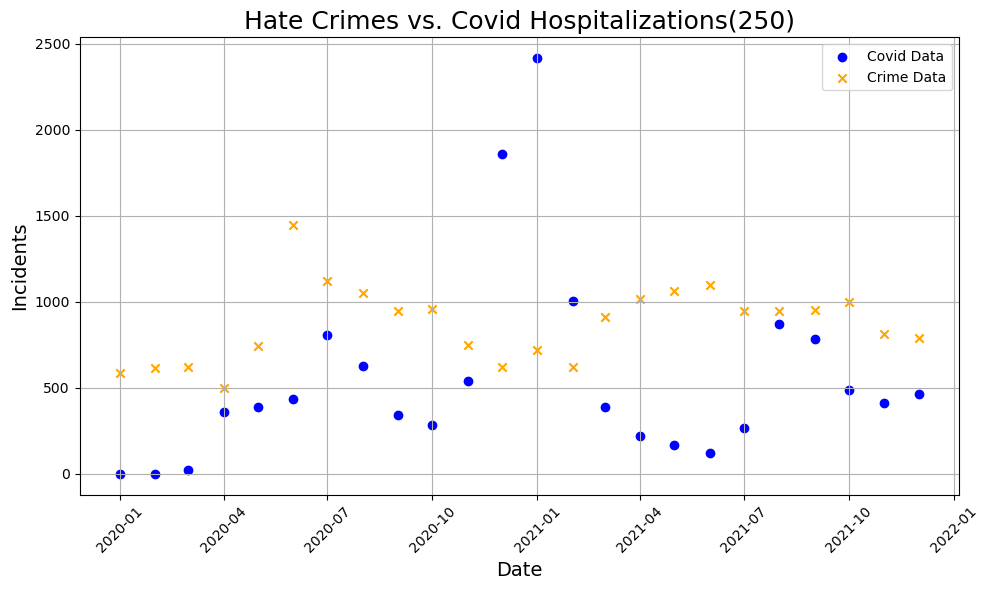

In [27]:
# data from covid19 hospitalization csv file and 
r_data = {
    "date": ["2020-01", "2020-02", "2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10",
             "2020-11", "2020-12", "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08",
             "2021-09", "2021-10", "2021-11", "2021-12"],
    "covid_data": [0, 0, 20, 362, 390, 437, 807, 629, 345, 286, 540, 1861, 2417, 1004, 388, 221, 171, 119, 265, 871, 785, 487,
                   414, 465],
    "crime_data": [589, 615, 620, 497, 743, 1446, 1120, 1049, 945, 956, 747, 622, 722, 623, 914, 1017, 1066, 1101, 946, 947,
                   950, 1000, 812, 791]
}

r_df = pd.DataFrame(r_data)

# Convert 'date' to datetime
r_df['Date'] = pd.to_datetime(r_df['date'])

# Plot scatter chart
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.scatter(r_df['Date'], r_df['covid_data'], label='Covid Data', marker='o', color='blue')
plt.scatter(r_df['Date'], r_df['crime_data'], label='Crime Data', marker='x', color='orange')

# Customize the plot
plt.title("Hate Crimes vs. Covid Hospitalizations(250)", fontsize=18)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Incidents', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Display correlation coefficient
correlation_matrix = np.corrcoef(r_df['covid_data'], r_df['crime_data'])
correlation_coefficient = correlation_matrix[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")
                                                         

# Show the plot
plt.tight_layout()  # Adjust layout
plt.show()

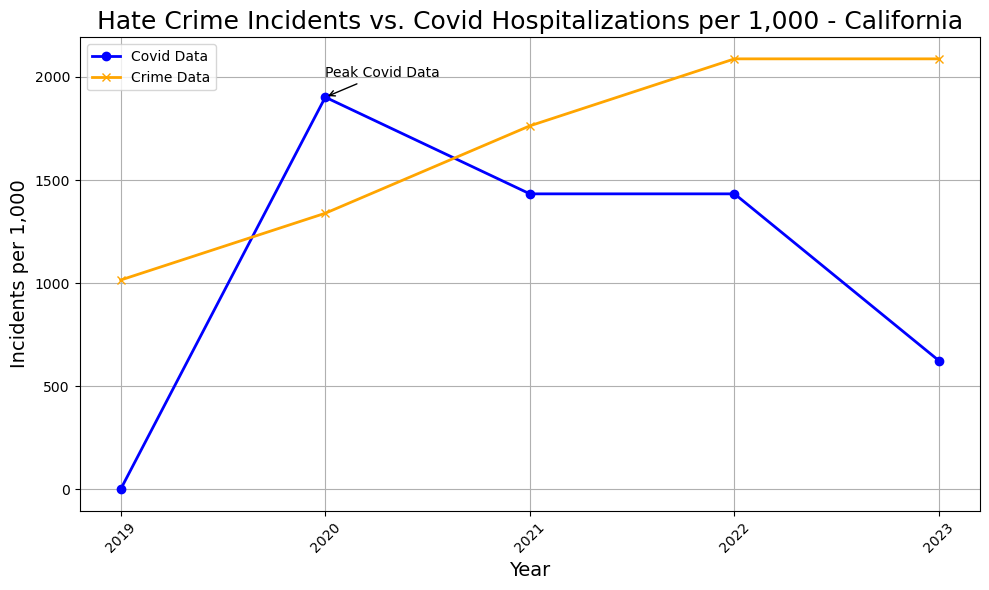

In [33]:

r_data = {"date":["2019", "2020", "2021", "2022","2023"],
                "covid_data": [0, 1902, 1433, 1433, 623,],
                "crime_data": [1015, 1339, 1763, 2088, 2088 ]} #No hate crime data for 2023 to be able to show

# Plot line chart
plt.figure(figsize=(10, 6))  # Adjust figure size
plt.plot(r_data['date'], r_data['covid_data'], label='Covid Data', marker='o', color='blue', linestyle='-', linewidth=2)
plt.plot(r_data['date'], r_data['crime_data'], label='Crime Data', marker='x', color='orange', linestyle='-', linewidth=2)

# Customize the plot
plt.title("Hate Crime Incidents vs. Covid Hospitalizations per 1,000 - California", fontsize=18)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Incidents per 1,000', fontsize=14)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)

# Annotate key points if needed
plt.annotate('Peak Covid Data', xy=('2020', 1902), xytext=('2020', 2000), arrowprops=dict(facecolor='black', arrowstyle='->'))

# Display the plot
plt.tight_layout()  # Adjust layout
plt.show()